<a href="https://colab.research.google.com/github/ormorteey/BST-222-Survival-Analysis/blob/main/BST_222_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("pacman")
library("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
p_load("tidyverse", "googledrive", "KMsurv", "survival", "survminer", "ggplot2")

In [3]:
rm(list = ls())

In [4]:
drive_deauth()
drive_user()
public_file = drive_get(as_id("1CXILLG1-6nRpczvQNnAWEpNdxKc0ed-2"))
drive_download(public_file, overwrite = TRUE)

ℹ Not logged in as any specific Google user.

File downloaded:

• addicts.txt <id: 1CXILLG1-6nRpczvQNnAWEpNdxKc0ed-2>

Saved locally as:

• addicts.txt



In [5]:
vars <- c("id","clinic","status","time","prison","methadone")
addicts <- read.table("addicts.txt",header=F,col.names=vars)

In [6]:
addicts$clinic = factor(addicts$clinic, labels = c("1", " 2"))
addicts$prison = factor(addicts$prison, labels = c("No", "Yes"))
# addicts$status = factor(addicts$status, labels = c("0", "1"))
head(addicts)


,id,clinic,status,time,prison,methadone
,<int>,<fct>,<int>,<int>,<fct>,<int>
1,1,1,1,428,No,50
2,2,1,1,275,Yes,55
3,3,1,1,262,No,55
4,4,1,1,183,No,30
5,5,1,1,259,Yes,65
6,6,1,1,714,No,55


The addicts data set is from a study by Caplehorn et al. (“Methadone Dosage and Retention of Patients in Maintenance Treatment,” Med. J. Aust., 1991). These data comprise the times in days spent by heroin addicts from entry to departure
from one of two methadone clinics. There are two further covariates, namely, prison record and methadone dose, believed to affect the survival times.

The data set and R input code are on the website. The variables are as follows:

id: Subject ID; clinic: Clinic (1 or 2); status: Survival status (0 = censored, 1 = departed from clinic); time: Survival time in days; prison: Prison record (0 = none, 1 = any); methadone: Methadone dose (mg/day).

1. Fit the Cox model with clinics as strata and prison and methadone as variables.

Use this model for the remaining questions.

2. Test proportionality of hazards with cox.zph on the model with strata(clinic), prison, and methadone. Make the plots vs. time of the Schoenfeld residuals for prison, and methadone. Interpret the results

3. Plot the cumulative hazard of the Cox-Snell residuals and interpret the apparent goodness of fit.

4. Plot the martingale residuals (omitting methadone) vs. methodone. Is there substantial evidence that methadone should be transformed?

5. Plot the martingale residuals vs. the linear predictor, the deviance residuals vs. the linear predictor, and the two dfbeta values by observation order. Identify
possibly interesting observations and try to interpret the results.

## **Q 1**

Fit the Cox model with clinics as strata and prison and methadone as variables.
Use this model for the remaining questions.

In [7]:
survival = Surv(time = addicts$time, event = addicts$status)
cox_model_1 <- coxph(survival~ strata(clinic) + prison + methadone, data = addicts)
print(summary(cox_model_1))

Call:
coxph(formula = survival ~ strata(clinic) + prison + methadone, 
    data = addicts)

  n= 238, number of events= 150 

               coef exp(coef)  se(coef)      z Pr(>|z|)    
prisonYes  0.389605  1.476397  0.168930  2.306   0.0211 *  
methadone -0.035115  0.965495  0.006465 -5.432 5.59e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
prisonYes    1.4764     0.6773    1.0603    2.0559
methadone    0.9655     1.0357    0.9533    0.9778

Concordance= 0.651  (se = 0.026 )
Likelihood ratio test= 33.91  on 2 df,   p=4e-08
Wald test            = 32.66  on 2 df,   p=8e-08
Score (logrank) test = 33.33  on 2 df,   p=6e-08



### **Q 2**

Test proportionality of hazards with cox.zph on the model with strata(clinic), prison, and methadone. Make the plots vs. time of the Schoenfeld residuals for prison, and methadone. Interpret the results

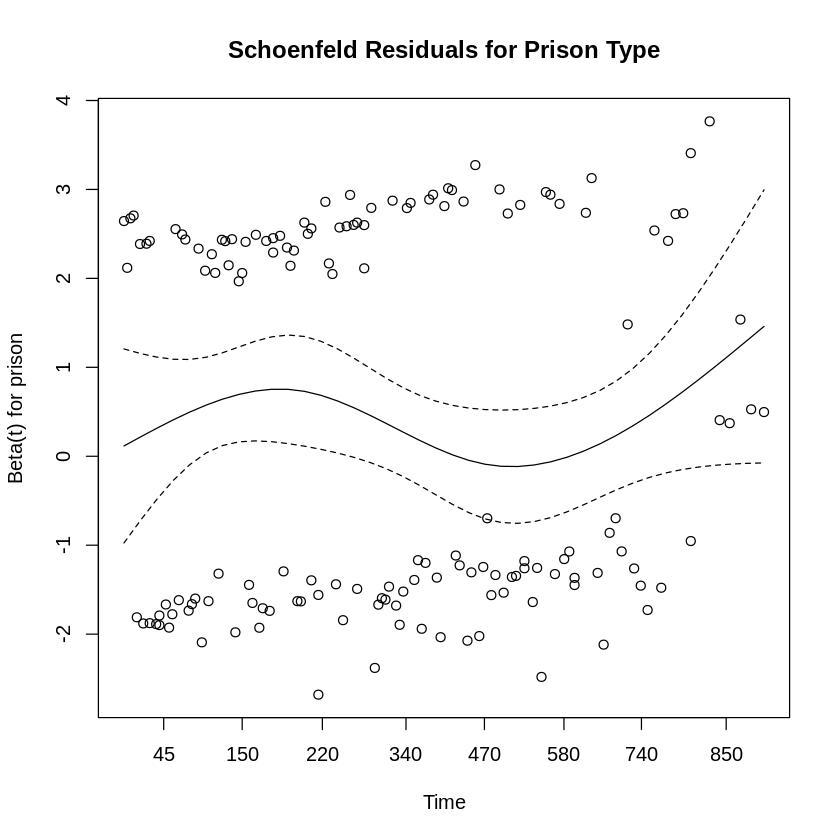

In [8]:
addicts.zph <- cox.zph(cox_model_1)
plot(addicts.zph[1], main = "Schoenfeld Residuals for Prison Type")


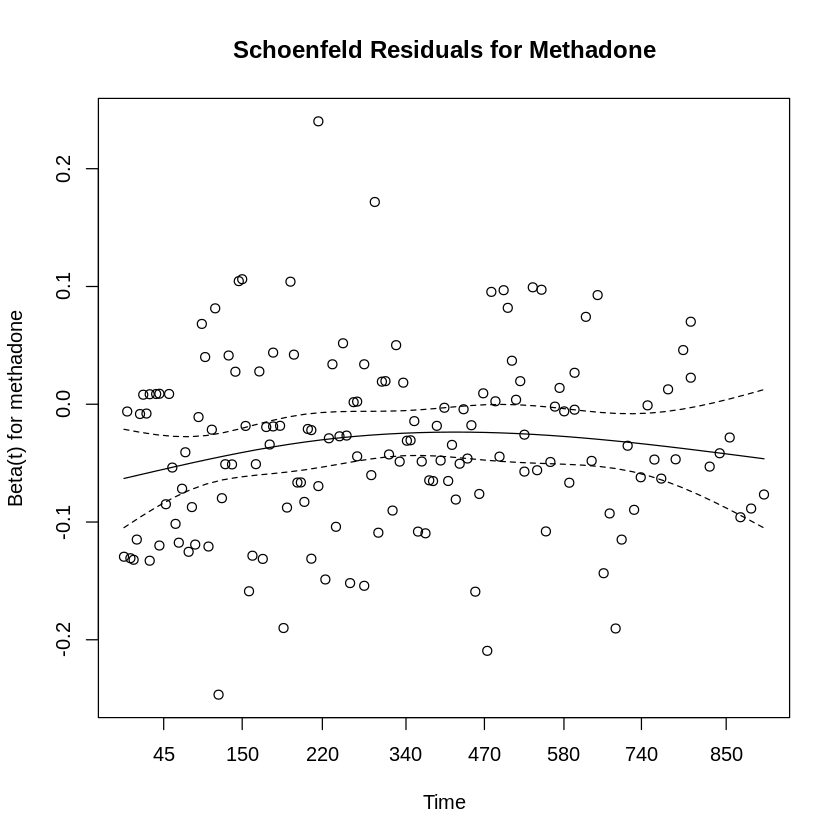

In [9]:
plot(addicts.zph[2], main = "Schoenfeld Residuals for Methadone")

#### **Interpretation**

From the plots, we can see some reasonable patterns in the Schoenfield residuals of Methadone. However, we do not see such pattern in that of prison variable.

### **Q3**

Plot the cumulative hazard of the Cox-Snell residuals and interpret the apparent goodness of fit.

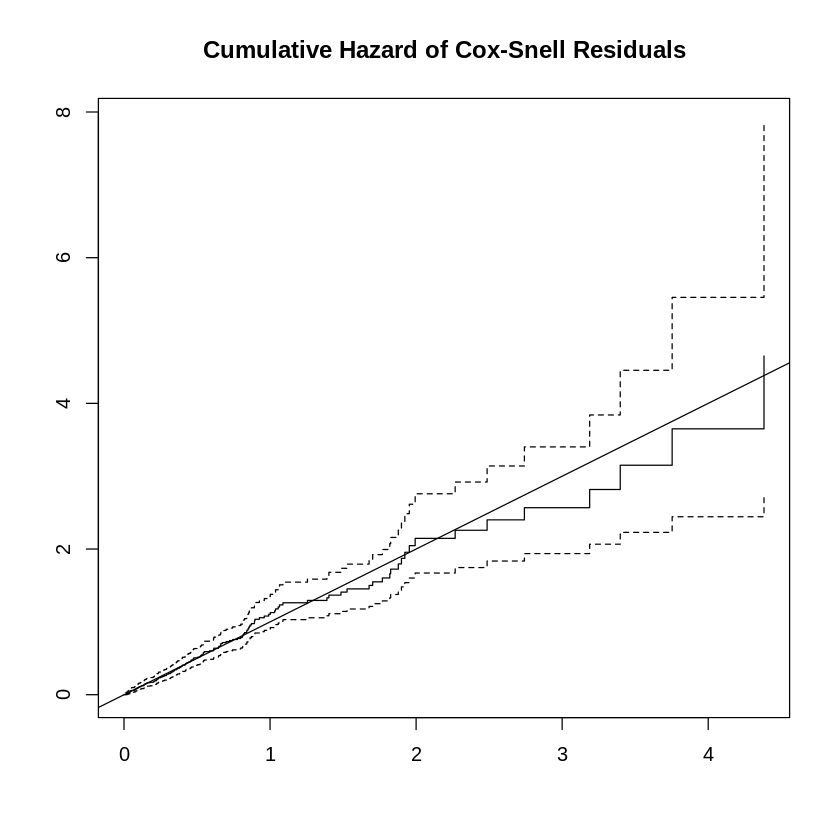

In [10]:
#fit martingale for full model
addicts.mart <- residuals(cox_model_1, type="martingale")
#find cox-snell residuals
addicts.cs <- addicts$status - addicts.mart
#cumaltive hazard of CS residuals
surv.csr <- survfit(Surv(addicts.cs,addicts$status)~1,type="fleming-harrington")

plot(surv.csr,fun="cumhaz")
abline(0,1)
title("Cumulative Hazard of Cox-Snell Residuals")

From the plot, we see the line has approximately a slop of 1 and an intercept of 0 (i.e it passes through the origin). We don't see a lack of fit based on these residuals.

## **Q4**

 Plot the martingale residuals (omitting methadone) vs. methodone. Is there substantial evidence that methadone should be transformed?

Call:
coxph(formula = survival ~ strata(clinic) + prison, data = addicts)

  n= 238, number of events= 150 

            coef exp(coef) se(coef)     z Pr(>|z|)  
prisonYes 0.3359    1.3992   0.1675 2.005    0.045 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
prisonYes     1.399     0.7147     1.008     1.943

Concordance= 0.544  (se = 0.023 )
Likelihood ratio test= 3.98  on 1 df,   p=0.05
Wald test            = 4.02  on 1 df,   p=0.04
Score (logrank) test = 4.05  on 1 df,   p=0.04



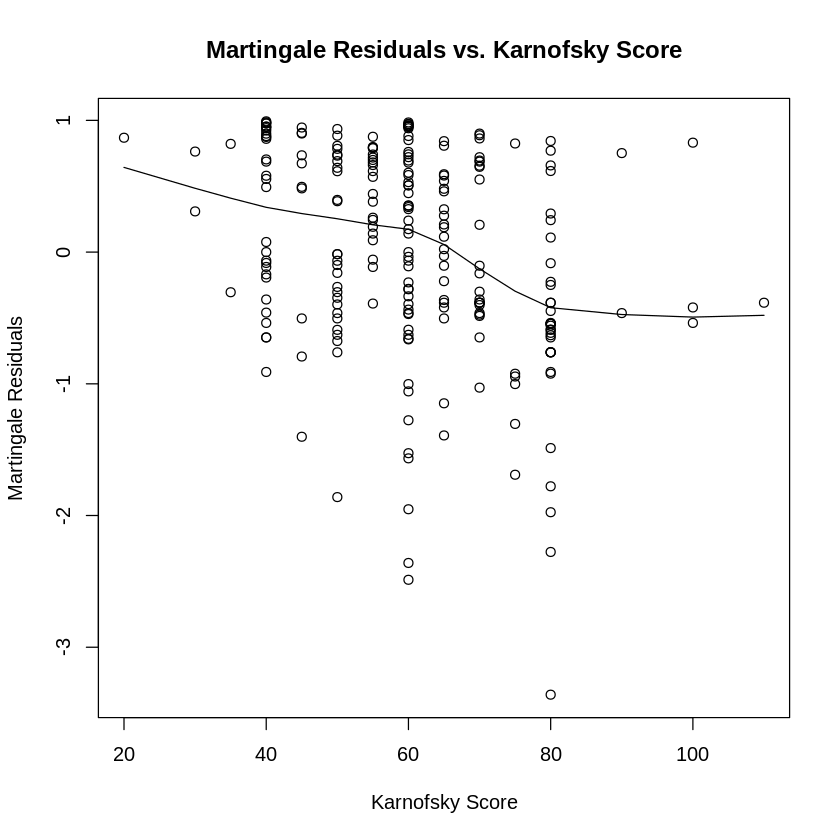

In [11]:
#fit without score
cox_model_2 <- coxph(survival~ strata(clinic) + prison, data = addicts)
print(summary(cox_model_2))
#find residuals
mres2 <- residuals(cox_model_2, type = "martingale")
#plot score vs residuals
plot(addicts$methadone,mres2,xlab="Karnofsky Score",ylab="Martingale Residuals")
lines(lowess(addicts$methadone,mres2))
title("Martingale Residuals vs. Karnofsky Score")

In [12]:
methadone_cat <- cut(addicts$methadone,c(0,60,80,max(addicts$methadone)+1),labels=c("Low","Medium", "High"))
table(methadone_cat)


methadone_cat
   Low Medium   High 
   145     87      6 

In [13]:

cox_model_3 <- coxph(survival~ strata(clinic) + prison + methadone_cat, data = addicts)
print(summary(cox_model_3))


Call:
coxph(formula = survival ~ strata(clinic) + prison + methadone_cat, 
    data = addicts)

  n= 238, number of events= 150 

                       coef exp(coef) se(coef)      z Pr(>|z|)    
prisonYes            0.3365    1.4001   0.1685  1.998   0.0458 *  
methadone_catMedium -0.7010    0.4961   0.1799 -3.897 9.73e-05 ***
methadone_catHigh   -0.4493    0.6381   0.7408 -0.606   0.5442    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                    exp(coef) exp(-coef) lower .95 upper .95
prisonYes              1.4001     0.7143    1.0064    1.9478
methadone_catMedium    0.4961     2.0158    0.3487    0.7058
methadone_catHigh      0.6381     1.5672    0.1494    2.7257

Concordance= 0.62  (se = 0.022 )
Likelihood ratio test= 20.26  on 3 df,   p=1e-04
Wald test            = 19.26  on 3 df,   p=2e-04
Score (logrank) test = 19.87  on 3 df,   p=2e-04



In [14]:
print(drop1(cox_model_1,test="Chisq"))

Single term deletions

Model:
survival ~ strata(clinic) + prison + methadone
               Df    AIC     LRT  Pr(>Chi)    
<none>            1199.0                      
strata(clinic)  0 1376.9 177.836              
prison          1 1202.3   5.259   0.02184 *  
methadone       1 1227.0  29.935 4.467e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [15]:
print(drop1(cox_model_2,test="Chisq"))

Single term deletions

Model:
survival ~ strata(clinic) + prison
               Df    AIC     LRT Pr(>Chi)  
<none>            1227.0                   
strata(clinic)  0 1411.8 184.865           
prison          1 1229.0   3.979  0.04608 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [16]:
print(drop1(cox_model_3,test="Chisq"))

Single term deletions

Model:
survival ~ strata(clinic) + prison + methadone_cat
               Df    AIC     LRT Pr(>Chi)    
<none>            1214.7                     
strata(clinic)  0 1389.0 174.263             
prison          1 1216.6   3.952 0.046820 *  
methadone_cat   2 1227.0  16.284 0.000291 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Looking at the AIC scores and the p-values, it does not appear that replacing the quantitative variable methadone with the 3-category factor gives an improvement. The p-value is not also better that that of the quantitative methadone.

### **Q 5**

Plot the martingale residuals vs. the linear predictor, the deviance residuals vs. the linear predictor, and the two dfbeta values by observation order. Identify possibly interesting observations and try to interpret the results.

In [17]:
#fit residuals
addicts.mart <- residuals(cox_model_3, type="martingale")
addicts.dev <- residuals(cox_model_3, type="deviance")
addicts.dfb <- residuals(cox_model_3, type="dfbeta")
#find linear predictor
addicts.preds <- predict(cox_model_3)

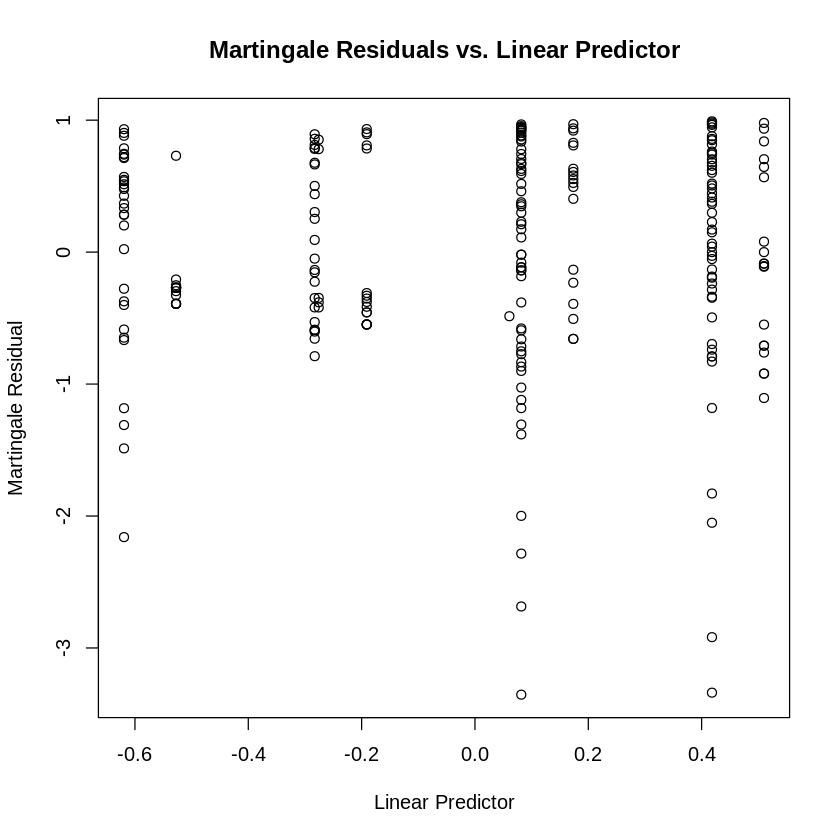

In [18]:
plot(addicts.preds,addicts.mart,xlab="Linear Predictor",ylab="Martingale Residual")
title("Martingale Residuals vs. Linear Predictor")

In [19]:
mart_df = data.frame(id = 1:length(addicts.mart), mart = addicts.mart)
mart_df <- mart_df[order(mart_df$mart),]

head(mart_df,9)
tail(mart_df,3)

,id,mart
,<int>,<dbl>
54,54,-3.353869
8,8,-3.338615
12,12,-2.918022
9,9,-2.685453
55,55,-2.284824
70,70,-2.159842
66,66,-2.051009
39,39,-1.998789
26,26,-1.829449


,id,mart
,<int>,<dbl>
123,123,0.9788940
164,164,0.9823166
175,175,0.9911974


Based on the plot, there are  nine obeservations at the bottom that appears unusual. Observations 8, 9, 12, 26, 39, 54, 55, 66 and 70 lie at the bottom i.e smallest martigale residuals.

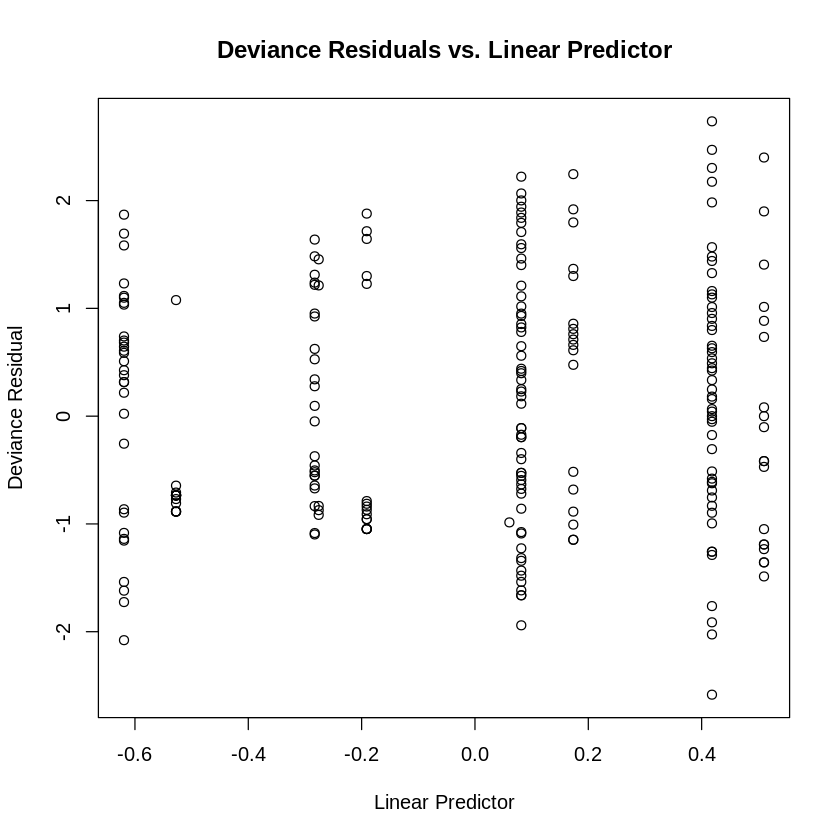

In [20]:
plot(addicts.preds,addicts.dev,xlab="Linear Predictor",ylab="Deviance Residual")
title("Deviance Residuals vs. Linear Predictor")

In [21]:
pred_df = data.frame(id = 1:length(addicts.preds), pred = addicts.preds)
pred_df <- pred_df[order(pred_df$pred),]
head(pred_df,3)
tail(pred_df,3)

,id,pred
,<int>,<dbl>
14,14,-0.6193232
19,19,-0.6193232
24,24,-0.6193232


,id,pred
,<int>,<dbl>
158,158,0.5100372
211,211,0.5100372
232,232,0.5100372


Some of the smallest observations with respect to deviance residual are 14, 19, and 24. While the large observations are 158, 211, and 232.

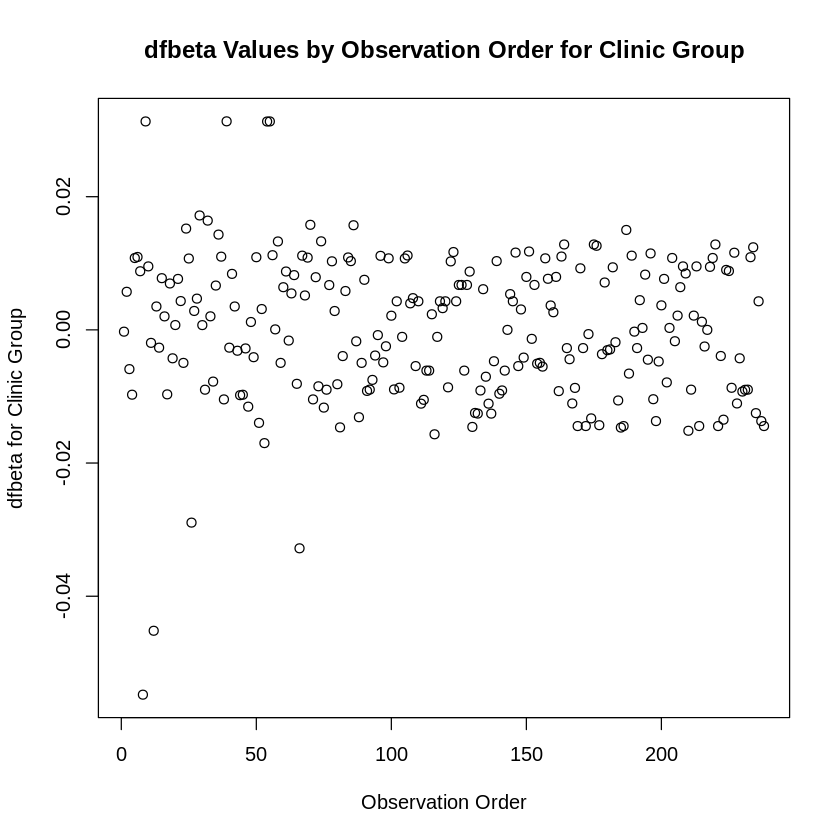

In [22]:
plot(addicts.dfb[,1],xlab="Observation Order",ylab="dfbeta for Clinic Group")
title("dfbeta Values by Observation Order for Clinic Group")

In [23]:
dfb1_df = data.frame(id = 1:length(addicts.dfb[,1]), dfb1 = addicts.dfb[,1])
dfb1_df <- dfb1_df[order(dfb1_df$dfb1),]

head(dfb1_df,5)
tail(dfb1_df,5)


,id,dfb1
,<int>,<dbl>
8,8,-0.05478077
12,12,-0.04518372
66,66,-0.03280346
26,26,-0.02894366
53,53,-0.01700655


,id,dfb1
,<int>,<dbl>
29,29,0.01717976
54,54,0.03128868
9,9,0.03130005
55,55,0.03130296
39,39,0.03131542


The four smallest bfbeta for clinic group are observations 8, 12, 26, and 66, while the three largest are observation 9, 39, 54, and 55.

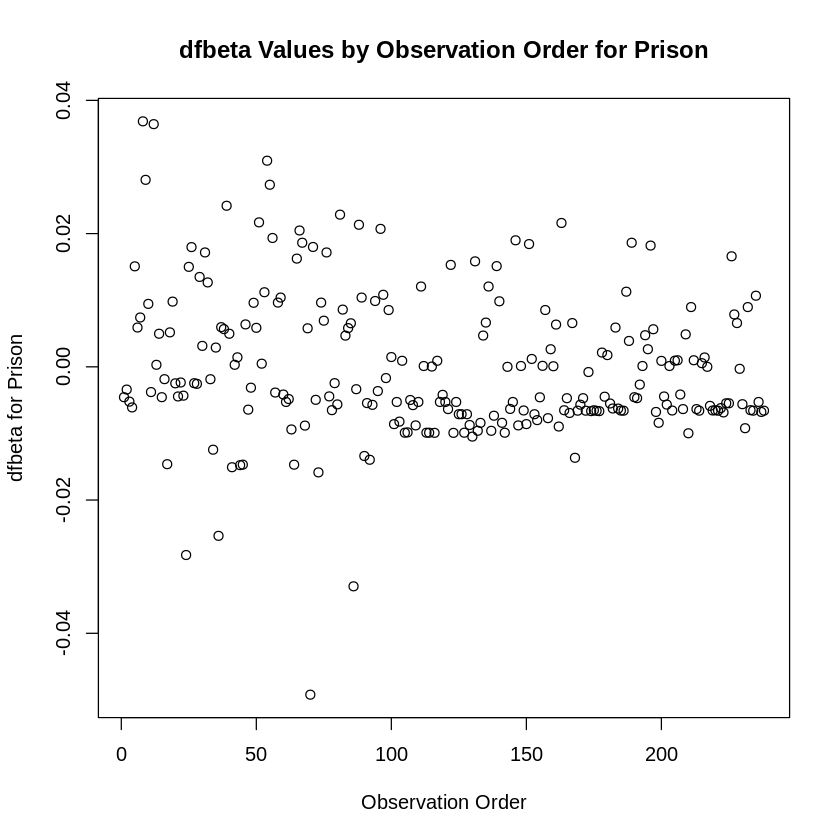

In [24]:
plot(addicts.dfb[,2],xlab="Observation Order",ylab="dfbeta for Prison")
title("dfbeta Values by Observation Order for Prison")

In [25]:
dfb2_df = data.frame(id = 1:length(addicts.dfb[,2]), dfb2 = addicts.dfb[,2])
dfb2_df <- dfb2_df[order(dfb2_df$dfb2),]

head(dfb2_df,4)
tail(dfb2_df,4)

,id,dfb2
,<int>,<dbl>
70,70,-0.04921491
86,86,-0.03295079
24,24,-0.02825089
36,36,-0.02537107


,id,dfb2
,<int>,<dbl>
9,9,0.02806875
54,54,0.03094188
12,12,0.03643113
8,8,0.03685192


The four smallest bfbeta for Prison are observations 24, 36, 70 and 86, while the three largest are observation 8, 9, 12 and 54.

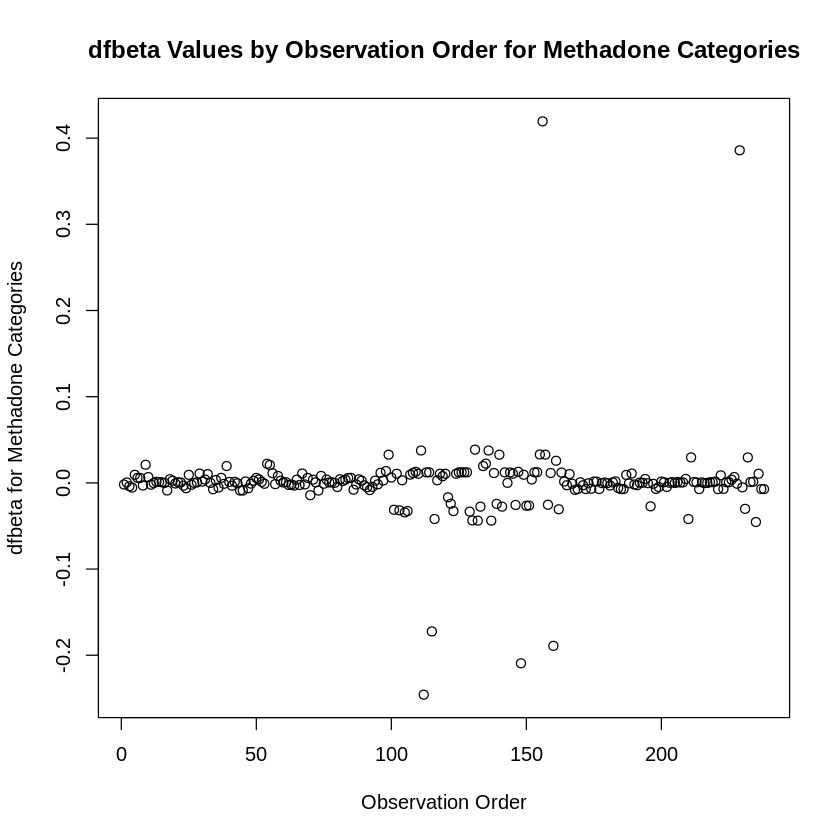

In [26]:
plot(addicts.dfb[,3],xlab="Observation Order",ylab="dfbeta for Methadone Categories")
title("dfbeta Values by Observation Order for Methadone Categories")

In [27]:
dfb3_df = data.frame(id = 1:length(addicts.dfb[,3]), dfb3 = addicts.dfb[,3])
dfb3_df <- dfb3_df[order(dfb3_df$dfb3),]

head(dfb3_df,4)
tail(dfb3_df,4)


,id,dfb3
,<int>,<dbl>
112,112,-0.2457336
148,148,-0.2093370
160,160,-0.1891214
115,115,-0.1723840


,id,dfb3
,<int>,<dbl>
136,136,0.03753604
131,131,0.03857467
229,229,0.38587605
156,156,0.41949268


The four smallest bfbeta for Methadone Categories group are observations 112, 115, 148, and 160, while the three largest are observation 131, 136, 156, and 229.

Martingale Residuals - 8, 9, 12, 26, 39, 54, 55, 66 and 70.

Deviance. Residuals - 14, 19, 24, 158, 211, and 232

Clinic Group Influence - 8, 12, 26, 66, 9, 39, 54, and 55.

Prison - 24, 36, 70, 86, 8, 9, 12 and 54

Methadone Categorical - 112, 115, 148, 160, 131, 136, 156, and 229

The most intresting observations seems to be 8, 9, 12, 24, and 54.

In [28]:
system("pip install pypandoc")

In [30]:

system("jupyter nbconvert --to HTML /content/BST_222_HW_4.ipynb")